In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/Amy1/Nutstore/1/我的坚果云/CODING/DATA/optiver-trading-at-the-close/train.csv')

In [4]:
df

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.000000,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.000000,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.000000,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.000000,-7.349849,0,0_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,2.310276,26454,480_540_195
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,-8.220077,26454,480_540_196
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,1.169443,26454,480_540_197
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,-1.540184,26454,480_540_198


1. **stock_id**
   - 股票的唯一标识符。（并非所有股票ID在每个时间段都存在。）后续看一下。

2. **date_id**
   - 日期的唯一标识符。日期ID是连续的，并且在所有股票中保持一致。

3. **imbalance_size**
   - 当前参考价格下未匹配的金额（以美元计）。

4. **imbalance_buy_sell_flag**
   - 反映拍卖不平衡方向的指标。
     - 买方不平衡：`1`
     - 卖方不平衡：`-1`
     - 无不平衡：`0`

5. **reference_price**
   - 在此价格下，配对的股票数量最大，不平衡最小，并且与买卖价中点的距离最小。可以理解为最接近的价格，介于最佳买入价和卖出价之间。

6. **matched_size**
   - 当前参考价格下可以匹配的金额（以美元计）。

7. **far_price**
   - 基于仅拍卖兴趣的交叉价格，将最大化匹配的股票数量。此计算不包括持续市场订单。

8. **near_price**
   - 基于拍卖和持续市场订单的交叉价格，将最大化匹配的股票数量。

9. **[bid/ask]_price**
   - 非拍卖簿中最有竞争力的买入/卖出层的价格。

10. **[bid/ask]_size**
    - 非拍卖簿中最有竞争力的买入/卖出层的美元金额。

11. **wap**
    - 非拍卖簿中的加权平均价格。

12. **seconds_in_bucket**
    - 这是一个时间戳，代表从当天收盘拍卖开始后经过的秒数。这个计时始终从0开始，帮助分析在收盘拍卖过程中的市场行为与时间的关系。

13. **target**
    - 需要预
    - 预测目标和，方差特定情况，神经网络输出后处理——均值为0的目标变量。
    - 一个股票在未来一分钟内的价格表现（相对于市场平均）。


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237980 entries, 0 to 5237979
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   stock_id                 int64  
 1   date_id                  int64  
 2   seconds_in_bucket        int64  
 3   imbalance_size           float64
 4   imbalance_buy_sell_flag  int64  
 5   reference_price          float64
 6   matched_size             float64
 7   far_price                float64
 8   near_price               float64
 9   bid_price                float64
 10  bid_size                 float64
 11  ask_price                float64
 12  ask_size                 float64
 13  wap                      float64
 14  target                   float64
 15  time_id                  int64  
 16  row_id                   object 
dtypes: float64(11), int64(5), object(1)
memory usage: 679.4+ MB


In [9]:
df.describe()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id
count,5.237980e+06,5.237980e+06,5.237980e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237760e+06,2.343638e+06,2.380800e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237892e+06,5.237980e+06
mean,9.928856e+01,2.415100e+02,2.700000e+02,5.715293e+06,-1.189619e-02,9.999955e-01,4.510025e+07,1.001713e+00,9.996601e-01,9.997263e-01,5.181359e+04,1.000264e+00,5.357568e+04,9.999920e-01,-4.756125e-02,1.331005e+04
std,5.787176e+01,1.385319e+02,1.587451e+02,2.051591e+07,8.853374e-01,2.532497e-03,1.398413e+08,7.214705e-01,1.216920e-02,2.499345e-03,1.114214e+05,2.510042e-03,1.293554e+05,2.497509e-03,9.452860e+00,7.619271e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,9.352850e-01,4.316610e+03,7.700000e-05,7.869880e-01,9.349150e-01,0.000000e+00,9.398270e-01,0.000000e+00,9.380080e-01,-3.852898e+02,0.000000e+00
25%,4.900000e+01,1.220000e+02,1.300000e+02,8.453415e+04,-1.000000e+00,9.987630e-01,5.279575e+06,9.963320e-01,9.971000e-01,9.985290e-01,7.374720e+03,9.990290e-01,7.823700e+03,9.987810e-01,-4.559755e+00,6.729000e+03
50%,9.900000e+01,2.420000e+02,2.700000e+02,1.113604e+06,0.000000e+00,9.999670e-01,1.288264e+07,9.998830e-01,9.998890e-01,9.997280e-01,2.196900e+04,1.000207e+00,2.301792e+04,9.999970e-01,-6.020069e-02,1.334500e+04
75%,1.490000e+02,3.610000e+02,4.100000e+02,4.190951e+06,1.000000e+00,1.001174e+00,3.270013e+07,1.003318e+00,1.002590e+00,1.000905e+00,5.583168e+04,1.001414e+00,5.787841e+04,1.001149e+00,4.409552e+00,1.990700e+04
max,1.990000e+02,4.800000e+02,5.400000e+02,2.982028e+09,1.000000e+00,1.077488e+00,7.713682e+09,4.379531e+02,1.309732e+00,1.077488e+00,3.028784e+07,1.077836e+00,5.440500e+07,1.077675e+00,4.460704e+02,2.645400e+04


1. 数据规模
- 5,237,980 行样本（大多数特征的行数一致，少数特征略少）。

2. 均值和标准差
- imbalance_size 和 matched_size 的均值分别是 5.71e6 和 4.51e7，说明股票的买卖不平衡度（imbalance_size）和撮合的交易规模（matched_size）差异较大，且标准差都很高，表明交易规模和不平衡度在数据中存在较大波动。
- reference_price 均值接近 1（0.9999955），说明价格波动在一定范围内。
- bid_price 和 ask_price 的均值也都接近 1，且标准差非常小，说明买卖报价之间差距很小，市场相对稳定。

3. 极值
- imbalance_size 从 0 到 2.98e9，差异非常大，说明有些股票的交易不平衡度非常高。
- matched_size 最大值为 7.71e9，意味着部分股票的交易规模非常大。
- far_price 和 near_price 分布在较小范围（约 0.8 到 1.3），这两者反映的是离场价格和入场价格，通常非常接近。

4. 四分位数
- 从四分位数可以看出，大多数特征分布比较集中，例如 bid_price 和 ask_price 的第 25% 到第 75% 的值几乎都在接近 1 的范围内，这说明在这些范围内交易较为频繁。
- target 的分布比较对称，均值为 -0.04756，四分位数值接近 0，表明大部分数据的目标值围绕着 0 左右波动，极端情况较少。

6. 买卖标志（imbalance_buy_sell_flag）
- 该变量的均值接近 0，标准差为 0.885，说明买卖标志数据分布均匀，大概有同样数量的买单和卖单。

7. 基于此的想法
- 由于部分特征（如 imbalance_size 和 matched_size）的极端值非常大，可能需要对这些数据进行异常值处理或分析其产生原因。
- 一些特征如 bid_price 和 ask_price 差异较小，可能可以通过它们的差值（价差）构建新的特征，进一步挖掘数据规律。
- 目标变量分析：target 变量的均值接近 0，可能需要进一步探究目标变量与其他特征的相关性。

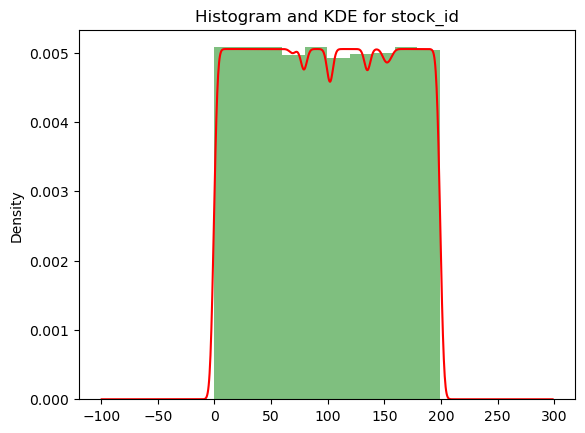

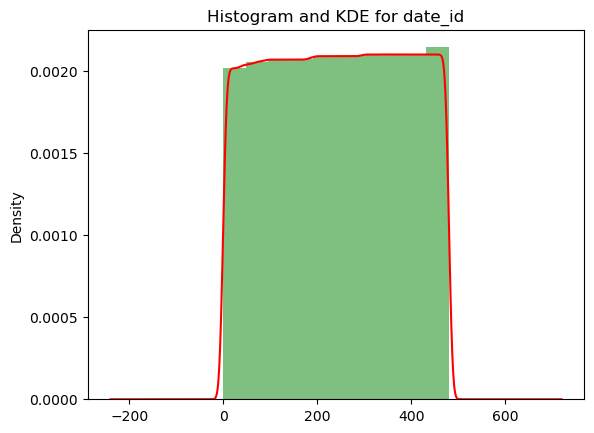

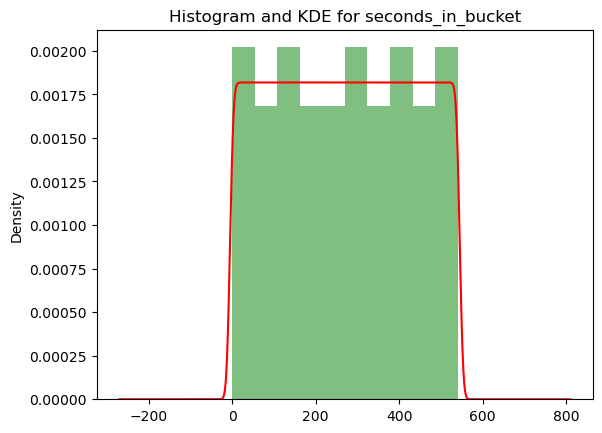

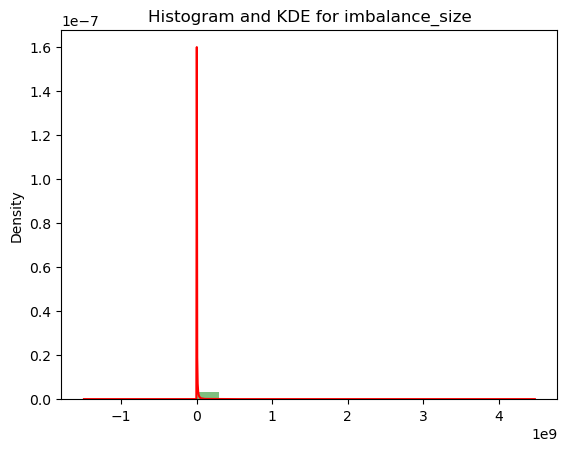

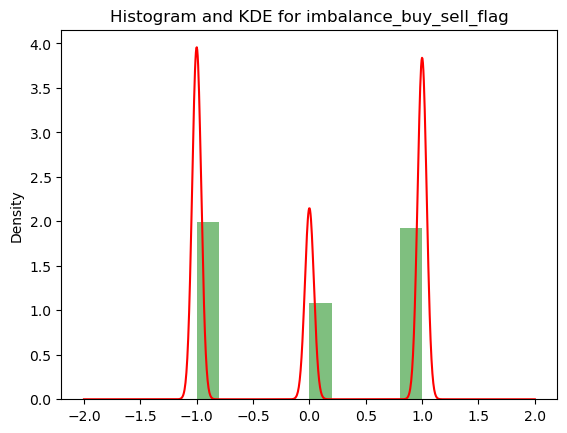

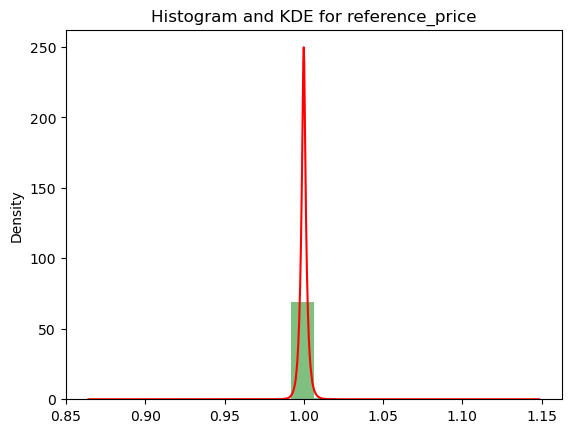

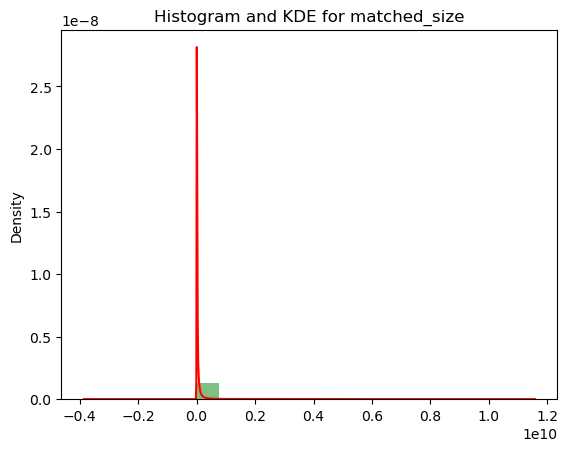

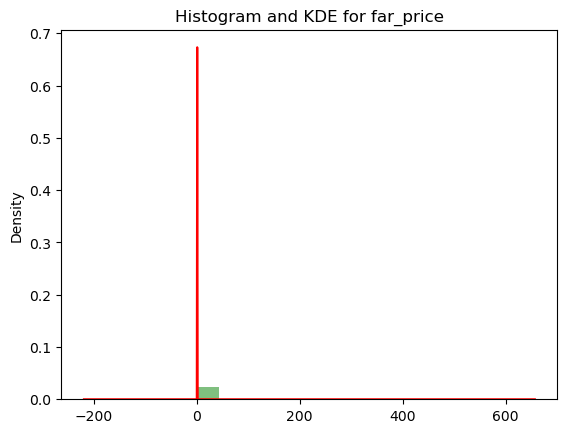

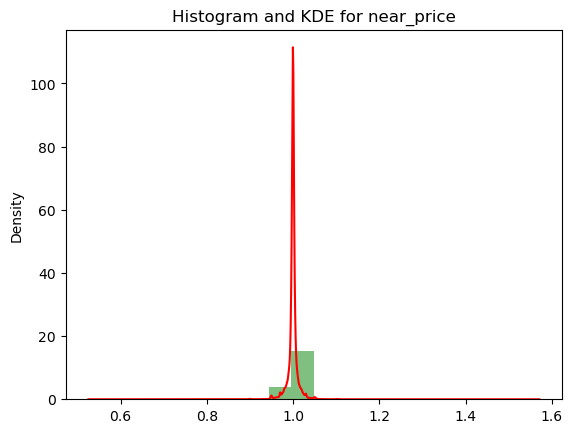

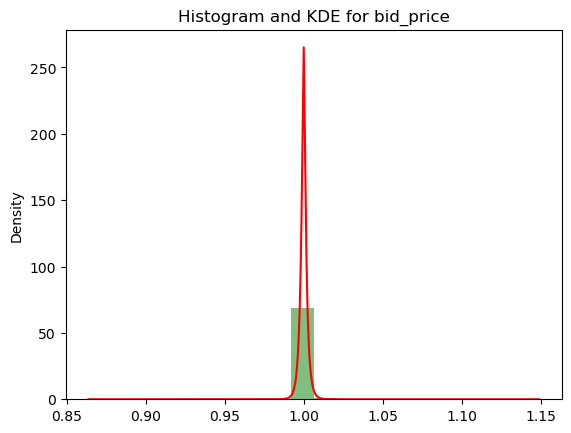

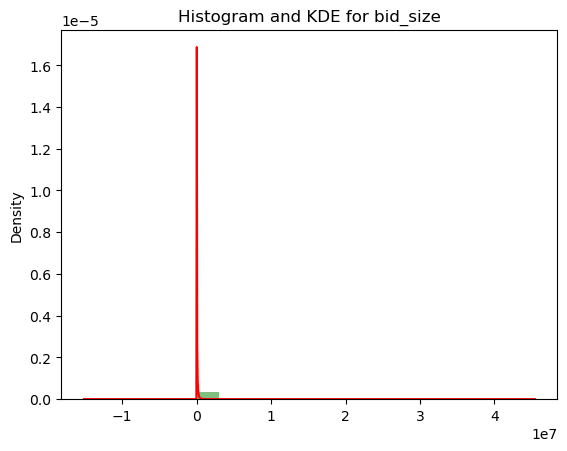

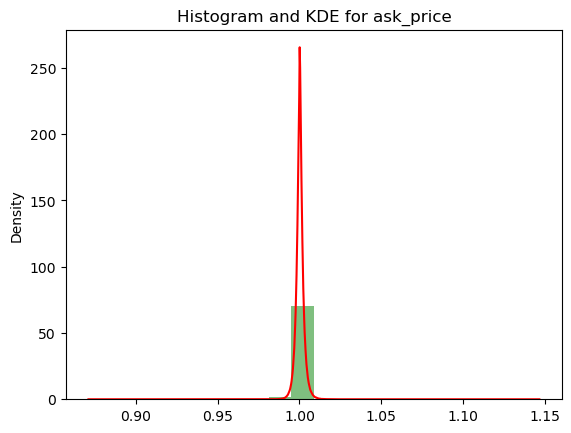

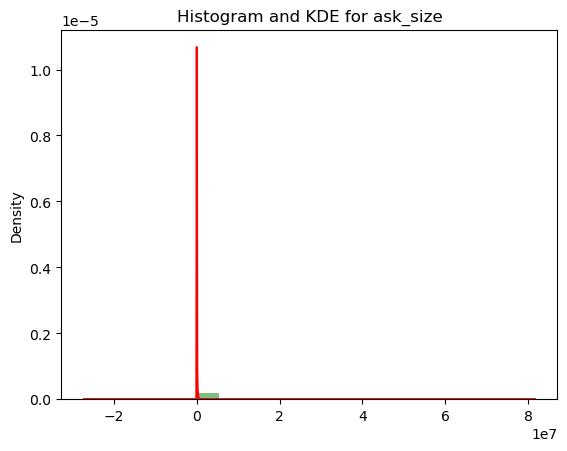

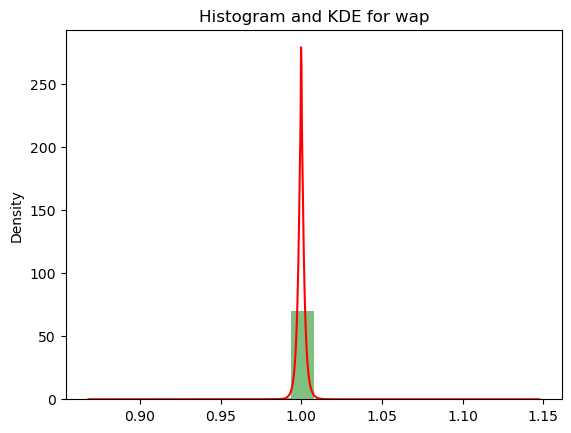

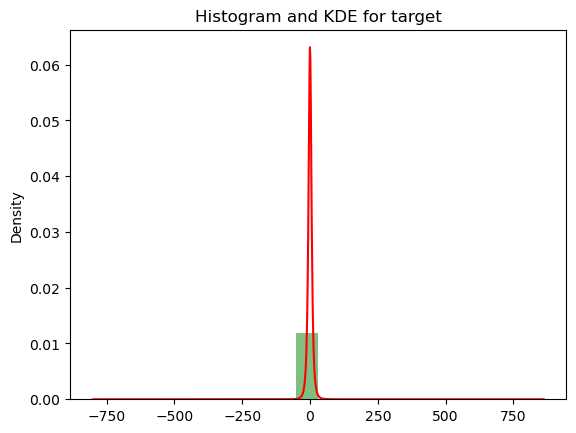

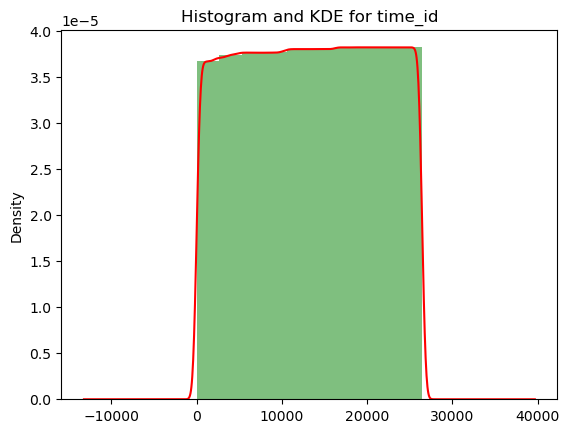

In [10]:
import matplotlib.pyplot as plt
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    fig, ax = plt.subplots()
    df[column].hist(density=True, alpha=0.5, color='g', ax=ax)
    df[column].plot(kind='kde', ax=ax, color='r')
    ax.set_title(f'Histogram and KDE for {column}')
    plt.show()


1. **seconds_in_bucket**:  
   数据在 0 到 600 秒之间均匀分布，几乎呈现平坦的分布。这可能代表交易时间的秒数，均匀分布表明每秒的交易机会是均等的。这可能对`target`的短期波动有影响，特别是如果`target`与秒级交易频率相关。
2. **imbalance_size**:  
   数据分布极不均衡，大部分数据集中在较小的值附近，但存在一些极大值。这种分布可能表明市场中的不平衡通常较小，但在极端情况下会产生非常大的市场不平衡。预测`target`时，这种不平衡可能是重要特征，因为市场不平衡会影响价格波动。

3. **imbalance_buy_sell_flag**:  
   该特征是离散的，有明显的三峰分布，对应于 -1（卖出）、0（无变化）、1（买入）。该变量可以直接用于分类问题的建模，可能对预测`target`有较大贡献，因为买卖方向可以显著影响目标变量。

4. **reference_price**:  
   该变量的分布非常集中，表明大部分交易的参考价格接近 1。这可能是归一化或标准化后的价格。由于价格信息往往是市场交易中的核心因素，虽然此特征集中分布，但可能仍然对`target`有预测力，特别是在细微的价格变化上。

5. **matched_size**:  
   类似于`imbalance_size`，其分布高度不均衡，大部分交易量较小，但存在极端大值。这表明少数情况下，成交量会突然剧增，可能会对目标变量有重要影响，尤其在高成交量的情况下。

6. **far_price 和 near_price**:  
   这些价格特征的分布集中在较小范围内，尤其是`near_price`紧邻 1。这些特征可能是市场买卖价差的一部分，它们的变化可能会影响`target`的价格波动，因此有潜在预测力。

7. **bid_price 和 ask_price**:  
   这两个变量的分布非常集中，基本围绕 1 展开。由于买卖价对市场价格变化有直接影响，这些特征在预测`target`时可能是关键因素。

8. **bid_size 和 ask_size**:  
   这两个特征的分布类似，大多数值接近 0，但也有极端的高值。买卖订单量的大小变化通常反映市场参与者的情绪和供需情况，可能对目标变量的波动产生重大影响，尤其在高订单量时期。

9. **wap (加权平均价格)**:  
    类似于其他价格相关的特征，`wap`值集中在 1 附近。作为成交量加权平均价格，它能反映市场真实交易情况，可能在预测`target`时起到关键作用，尤其是在高波动期间。

10. **target**:  
    `target`分布非常集中，几乎全部聚集在 0 附近。这表明预测的目标值大多是静态的，变化较少，存在少量异常值。如果你正在预测价格波动，可能需要特别注意这些异常值，它们可能代表剧烈的市场变化。

### 总结：
- 数据中存在许多极端值（`imbalance_size`、`matched_size`、`bid_size`、`ask_size`等），这些极端事件可能对目标变量有重要影响，建议在建模时对这些特征进行适当处理（例如标准化、对数变换等）。
- `imbalance_buy_sell_flag` 等离散变量直接反映市场买卖行为，可能对`target`有直接影响，值得重点关注。
- 价格相关特征如`reference_price`、`bid_price`、`ask_price`和`wap`等在分布上较为集中，但它们的微小变化也可能对`target`产生显著影响，因此需要进行更细致的分析。

In [11]:
type(column)

str

In [12]:
column

'imbalance_size'

In [11]:
df.isna().sum()

stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                 220
imbalance_buy_sell_flag          0
reference_price                220
matched_size                   220
far_price                  2894342
near_price                 2857180
bid_price                      220
bid_size                         0
ask_price                      220
ask_size                         0
wap                            220
target                          88
time_id                          0
row_id                           0
dtype: int64

In [12]:
set(df['stock_id'])

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [24]:
set(df['date_id'])

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [13]:
len(df['stock_id'].unique())

200

In [25]:
len(df['date_id'].unique())

481

In [26]:
len(df['seconds_in_bucket'].unique())

55

我遇到了问题我想看哪些股票少了在特定的日期里——从baseline里学到了（先看stockdate组合后的时间步长是不是都是55，然后把stockdate排列组合合并判断这个是不是在train里，把不在的拿出来）

In [7]:
df.columns

Index(['stock_id', 'date_id', 'seconds_in_bucket', 'imbalance_size',
       'imbalance_buy_sell_flag', 'reference_price', 'matched_size',
       'far_price', 'near_price', 'bid_price', 'bid_size', 'ask_price',
       'ask_size', 'wap', 'target', 'time_id', 'row_id'],
      dtype='object')

In [5]:
features = ['imbalance_size',
       'imbalance_buy_sell_flag', 'reference_price', 'matched_size',
       'far_price', 'near_price', 'bid_price', 'bid_size', 'ask_price',
       'ask_size', 'wap']  # 替换成你的实际特征列名
target = 'target'

# 计算每个特征和 target 的相关系数
correlation_matrix = df[features + [target]].corr()

# 输出 target 列的相关系数
target_correlation = correlation_matrix[target]

# 打印出结果，除了目标列本身（1），其他列与目标的相关性
print(target_correlation.drop(target))

imbalance_size            -0.001190
imbalance_buy_sell_flag    0.015102
reference_price           -0.017394
matched_size               0.000197
far_price                 -0.001804
near_price                 0.006045
bid_price                 -0.022326
bid_size                  -0.018000
ask_price                 -0.021674
ask_size                   0.014936
wap                       -0.035165
Name: target, dtype: float64


这些特征与 target 之间没有明显的线性关系。
wap（加权平均价格）是唯一一个稍微有显著负相关的特征，但相关性仍然很低 (-0.035)，表明可能存在一些非线性关系。
由于这些特征与 target 的线性相关性较弱，可能需要使用更复杂的非线性模型（如随机森林、XGBoost 等）来挖掘特征与目标变量之间的深层次关系。

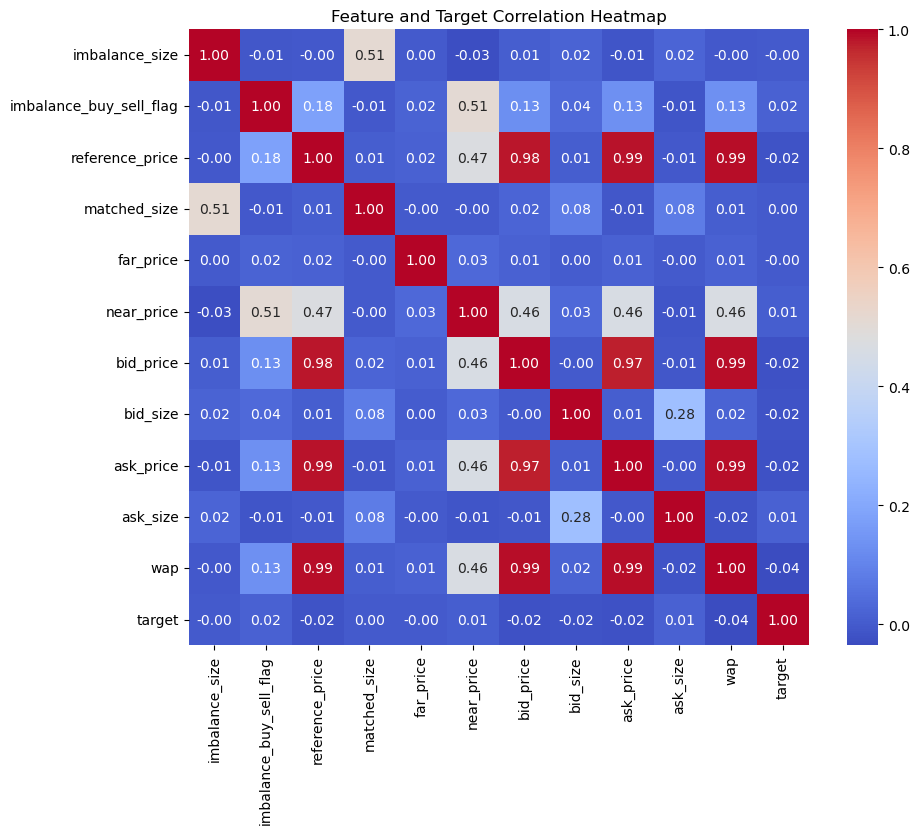

In [15]:
# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature and Target Correlation Heatmap")
plt.show()

与 target 的相关性：绝大多数特征与 target 的相关性较弱，只有 wap 具有稍微强一点的负相关性（-0.04），其余特征如 imbalance_buy_sell_flag 和 ask_size 有微弱的正相关。
特征之间的相关性：一些价格相关的特征如 reference_price、bid_price、ask_price 和 wap 之间有极强的正相关性，这表明这些价格特征高度同步。另外，matched_size 和 imbalance_size 之间存在中等负相关，说明市场不平衡和成交量之间可能有一定的反向关系。

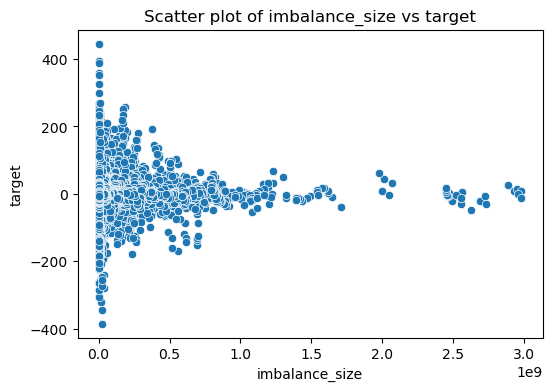

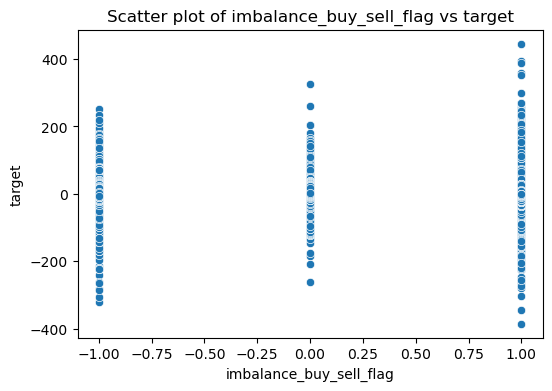

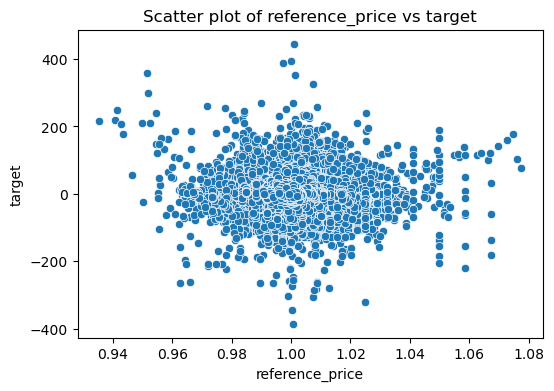

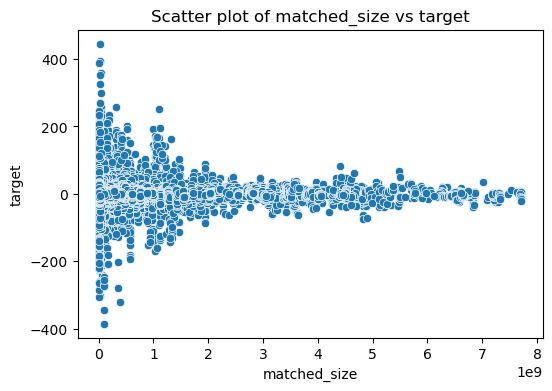

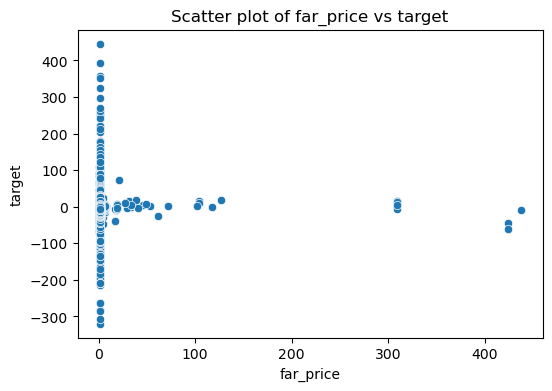

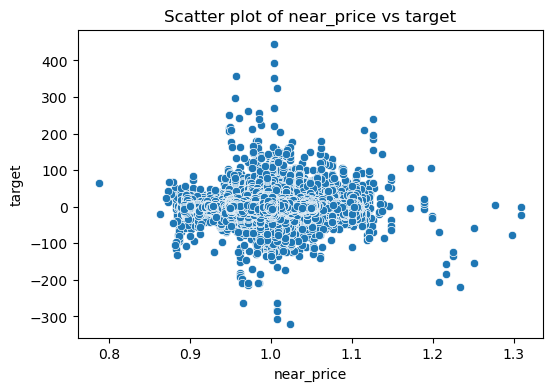

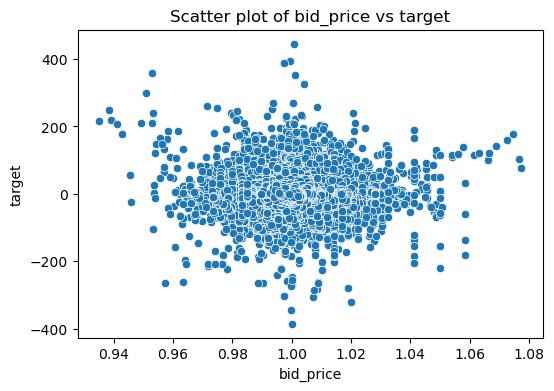

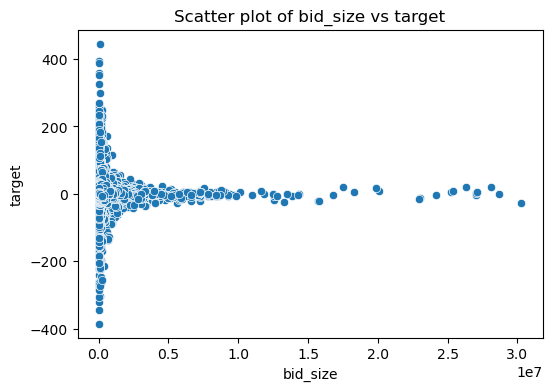

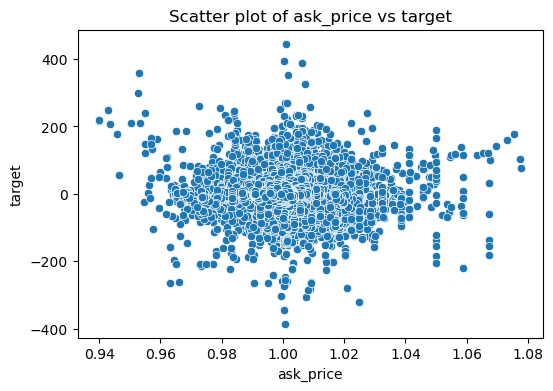

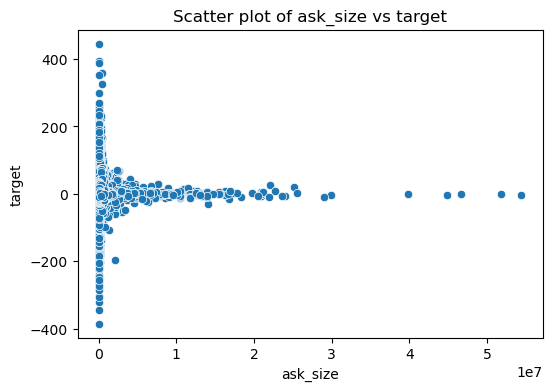

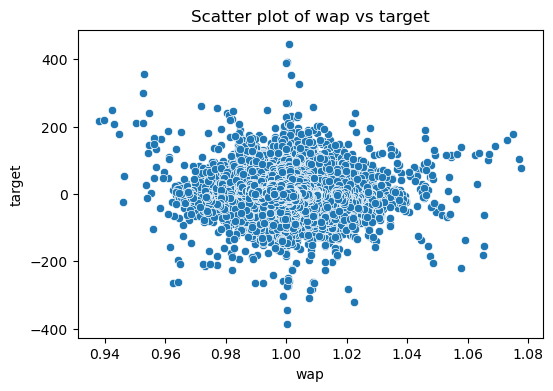

In [16]:
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=feature, y=target)
    plt.title(f'Scatter plot of {feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

部分特征（如 imbalance_size、bid_size 和 ask_size）在较小值时对 target 具有较大的波动影响，而在较大值时，波动逐渐变小并趋于平稳。特征之间的关系较为复杂，没有明显的线性趋势

样本分类——平衡，样本回归——极端值

In [6]:
from scipy import stats

# 计算 Z 分数
df['zscore_imbalance_size'] = stats.zscore(df['imbalance_size'])
df['zscore_matched_size'] = stats.zscore(df['matched_size'])
df['zscore_bid_size'] = stats.zscore(df['bid_size'])
df['zscore_ask_size'] = stats.zscore(df['ask_size'])
# 过滤出 Z 分数大于3的异常值
outliers_imbalance = df[df['zscore_imbalance_size'].abs() > 3]
outliers_matched = df[df['zscore_matched_size'].abs() > 3]
outliers_bid_size = df[df['zscore_bid_size'].abs() > 3]
outliers_ask_size = df[df['zscore_ask_size'].abs() > 3]

print(f"Number of outliers in imbalance_size: {len(outliers_imbalance)}")
print(f"Number of outliers in matched_size: {len(outliers_matched)}")
print(f"Number of outliers in bid_size: {len(outliers_bid_size)}")
print(f"Number of outliers in ask_size: {len(outliers_ask_size)}")


Number of outliers in imbalance_size: 0
Number of outliers in matched_size: 0
Number of outliers in bid_size: 72015
Number of outliers in ask_size: 53540


极端值bidsize和asksize其实也合理，买/卖量

In [45]:
missing_rows = df1[df1.isna().any(axis=1)]
print(missing_rows)

Empty DataFrame
Columns: [stock_id, date_id, seconds_in_bucket, imbalance_size, imbalance_buy_sell_flag, reference_price, matched_size, bid_price, bid_size, ask_price, ask_size, wap, target, time_id, row_id]
Index: []


In [7]:
df1 = df.copy()  # 创建副本

# 使用重新赋值的方法，避免使用 inplace=True
df1['imbalance_size'] = df1['imbalance_size'].fillna(df1['imbalance_size'].mean())
df1['reference_price'] = df1['reference_price'].fillna(df1['reference_price'].mean())
df1['matched_size'] = df1['matched_size'].fillna(df1['matched_size'].mean())
df1['bid_price'] = df1['bid_price'].fillna(df1['bid_price'].mean())
df1['ask_price'] = df1['ask_price'].fillna(df1['ask_price'].mean())
df1['wap'] = df1['wap'].fillna(df1['wap'].mean())

# 删除列和行
df1 = df1.drop(columns=['far_price', 'near_price'])
df1 = df1.dropna(subset=['target'])


In [ ]:
df.isna()

In [8]:
df1.head(20)

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id,zscore_imbalance_size,zscore_matched_size,zscore_bid_size,zscore_ask_size
0,0,0,0,3180602.69,1,0.999812,13380276.64,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0,NaN,NaN,0.079320,-0.348518
1,1,0,0,166603.91,-1,0.999896,1642214.25,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1,NaN,NaN,-0.436007,-0.254884
2,2,0,0,302879.87,-1,0.999561,1819368.03,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2,NaN,NaN,-0.124371,-0.267331
3,3,0,0,11917682.27,-1,1.000171,18389745.62,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3,NaN,NaN,-0.444158,3.289052
4,4,0,0,447549.96,-1,0.999532,17860614.95,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4,NaN,NaN,-0.317067,-0.410818
5,5,0,0,0.00,0,1.000635,13552875.92,0.999779,1962.72,1.000635,5647.65,1.0,6.779432,0,0_0_5,NaN,NaN,-0.447408,-0.370514
6,6,0,0,969969.40,1,1.000115,3647503.98,0.999506,6663.16,1.000283,3810.48,1.0,-2.499819,0,0_0_6,NaN,NaN,-0.405222,-0.384717
7,7,0,0,9412959.10,1,0.999818,21261245.87,0.999741,5139.20,1.000130,2570.60,1.0,-1.959801,0,0_0_7,NaN,NaN,-0.418900,-0.394302
8,8,0,0,2394875.85,1,0.999916,9473209.08,0.999022,52011.60,1.000041,2169.36,1.0,-5.970001,0,0_0_8,NaN,NaN,0.001777,-0.397404
9,9,0,0,3039700.65,-1,1.000969,6248958.45,0.999354,6191.00,1.000646,6199.00,1.0,7.970333,0,0_0_9,NaN,NaN,-0.409460,-0.366252


In [30]:
df1['stock_id'] == df1.index

0           True
1           True
2           True
3           True
4           True
           ...  
5237975    False
5237976    False
5237977    False
5237978    False
5237979    False
Length: 5237892, dtype: bool

In [20]:
df['stock_id'] == df.index

0           True
1           True
2           True
3           True
4           True
           ...  
5237975    False
5237976    False
5237977    False
5237978    False
5237979    False
Length: 5237980, dtype: bool

In [9]:
x_columns = df1.columns
x_columns

Index(['stock_id', 'date_id', 'seconds_in_bucket', 'imbalance_size',
       'imbalance_buy_sell_flag', 'reference_price', 'matched_size',
       'bid_price', 'bid_size', 'ask_price', 'ask_size', 'wap', 'target',
       'time_id', 'row_id', 'zscore_imbalance_size', 'zscore_matched_size',
       'zscore_bid_size', 'zscore_ask_size'],
      dtype='object')

In [10]:
print(df1.columns)

Index(['stock_id', 'date_id', 'seconds_in_bucket', 'imbalance_size',
       'imbalance_buy_sell_flag', 'reference_price', 'matched_size',
       'bid_price', 'bid_size', 'ask_price', 'ask_size', 'wap', 'target',
       'time_id', 'row_id', 'zscore_imbalance_size', 'zscore_matched_size',
       'zscore_bid_size', 'zscore_ask_size'],
      dtype='object')


In [17]:
x_columnsfeature = x_columns.drop(['target','time_id', 'row_id'])
x_columnsfeature

Index(['stock_id', 'date_id', 'seconds_in_bucket', 'imbalance_size',
       'imbalance_buy_sell_flag', 'reference_price', 'matched_size',
       'bid_price', 'bid_size', 'ask_price', 'ask_size', 'wap',
       'zscore_imbalance_size', 'zscore_matched_size', 'zscore_bid_size',
       'zscore_ask_size'],
      dtype='object')

In [12]:
df1.columns

Index(['stock_id', 'date_id', 'seconds_in_bucket', 'imbalance_size',
       'imbalance_buy_sell_flag', 'reference_price', 'matched_size',
       'bid_price', 'bid_size', 'ask_price', 'ask_size', 'wap', 'target',
       'time_id', 'row_id', 'zscore_imbalance_size', 'zscore_matched_size',
       'zscore_bid_size', 'zscore_ask_size'],
      dtype='object')

In [15]:
y = df1['target']

In [18]:
x = df1[x_columnsfeature]

In [ ]:
x_columnsfeature

In [19]:
x

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,bid_price,bid_size,ask_price,ask_size,wap,zscore_imbalance_size,zscore_matched_size,zscore_bid_size,zscore_ask_size
0,0,0,0,3180602.69,1,0.999812,13380276.64,0.999812,60651.50,1.000026,8493.03,1.000000,NaN,NaN,0.079320,-0.348518
1,1,0,0,166603.91,-1,0.999896,1642214.25,0.999896,3233.04,1.000660,20605.09,1.000000,NaN,NaN,-0.436007,-0.254884
2,2,0,0,302879.87,-1,0.999561,1819368.03,0.999403,37956.00,1.000298,18995.00,1.000000,NaN,NaN,-0.124371,-0.267331
3,3,0,0,11917682.27,-1,1.000171,18389745.62,0.999999,2324.90,1.000214,479032.40,1.000000,NaN,NaN,-0.444158,3.289052
4,4,0,0,447549.96,-1,0.999532,17860614.95,0.999394,16485.54,1.000016,434.10,1.000000,NaN,NaN,-0.317067,-0.410818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,1.000317,32257.04,1.000434,319862.40,1.000328,NaN,NaN,-0.175519,2.058566
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000643,205108.40,1.000900,93393.07,1.000819,NaN,NaN,1.375811,0.307814
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,16790.66,0.995883,180038.32,0.995797,NaN,NaN,-0.314329,0.977637
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.998970,125631.72,0.999210,669893.00,0.999008,NaN,NaN,0.662513,4.764526


In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
    x, y, test_size=0.33, shuffle=False, random_state=42)

分割样本

In [58]:
X_valid

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,bid_price,bid_size,ask_price,ask_size,wap
3509418,38,323,470,8019571.61,1,0.995129,2.802026e+07,0.994995,98224.54,0.995129,37015.00,0.995092
3509419,39,323,470,368943.50,1,0.997772,2.505260e+07,0.997547,7094.72,0.997772,443.52,0.997759
3509420,40,323,470,10462.05,1,1.001441,1.450977e+07,1.001345,17460.20,1.001537,27941.68,1.001419
3509421,41,323,470,1842955.49,-1,1.001260,3.364126e+08,1.001321,30370.08,1.001383,32658.00,1.001351
3509422,42,323,470,42074.58,-1,0.999889,5.900836e+06,0.999848,24746.00,1.000818,64154.30,1.000118
...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,2.828036e+07,1.000317,32257.04,1.000434,319862.40,1.000328
5237976,196,480,540,349510.47,-1,1.000643,9.187699e+06,1.000643,205108.40,1.000900,93393.07,1.000819
5237977,197,480,540,0.00,0,0.995789,1.272544e+07,0.995789,16790.66,0.995883,180038.32,0.995797
5237978,198,480,540,1000898.84,1,0.999210,9.477327e+07,0.998970,125631.72,0.999210,669893.00,0.999008


In [59]:
from sklearn import linear_model
from sklearn.metrics import r2_score
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [60]:
reg.coef_

array([ 3.58282537e-05,  2.22359027e-04, -1.22455010e-04,  1.55179817e-10,
        3.22375668e-02,  1.53443806e+03,  1.66844456e-10,  2.76883965e+03,
        7.65713599e-07,  2.92860577e+03, -7.39581455e-07, -7.33124175e+03])

In [61]:
y_validpred = reg.predict(X_valid)

In [62]:
from sklearn.metrics import r2_score
r2_score(y_valid, y_validpred)

0.005987569240700097

In [63]:
X_train.columns

Index(['stock_id', 'date_id', 'seconds_in_bucket', 'imbalance_size',
       'imbalance_buy_sell_flag', 'reference_price', 'matched_size',
       'bid_price', 'bid_size', 'ask_price', 'ask_size', 'wap'],
      dtype='object')

In [65]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train, y_train)
reg.coef_
y_validpred = reg.predict(X_valid)
r2 = r2_score(y_valid, y_validpred)
print(reg.coef_, r2)

[-0.00000000e+00  3.57468767e-04 -1.19292923e-04  2.32120973e-10
  6.64665445e-02 -0.00000000e+00  6.85848889e-11 -0.00000000e+00
 -2.12113336e-06 -0.00000000e+00  1.65020348e-06 -0.00000000e+00] 0.0005676466836707084


按平均绝对误差拟合，指标r2——模型解释能力

In [66]:
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import r2_score

# 创建 XGBoost 回归模型
xgb_model = xgb.XGBRegressor(objective='reg:absoluteerror', n_estimators=100, learning_rate=0.05, max_depth=6)

# 使用 TimeSeriesSplit 进行交叉验证
tscv = TimeSeriesSplit(n_splits=5)

# 进行交叉验证并计算每次的 r2 分数
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=tscv, scoring='r2')

# 使用完整训练集训练模型
xgb_model.fit(X_train, y_train)

# 在验证集上进行预测
y_validpred = xgb_model.predict(X_valid)

# 计算 R^2 score
r2 = r2_score(y_valid, y_validpred)
print(f"R^2 score on validation set: {r2}")

R^2 score on validation set: 0.017682005367634535


按平均绝对误差拟合，平均绝对误差指标——误差挺小的

In [79]:
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


# 创建 XGBoost 回归模型
xgb_model = xgb.XGBRegressor(objective='reg:absoluteerror', n_estimators=100, learning_rate=0.05, max_depth=6)

# 使用 TimeSeriesSplit 进行交叉验证
tscv = TimeSeriesSplit(n_splits=5)

# 进行交叉验证并计算每次的 r2 分数
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=tscv, scoring='r2')

# 使用完整训练集训练模型
xgb_model.fit(X_train, y_train)

# 在验证集上进行预测
y_validpred = xgb_model.predict(X_valid)

# 计算 MAE (Mean Absolute Error)
mae = mean_absolute_error(y_valid, y_validpred)
print(f"Mean Absolute Error on validation set: {mae}")

Mean Absolute Error on validation set: 6.121781348453365


In [80]:
print(f"Min value: {y_valid.min()}")
print(f"Max value: {y_valid.max()}")
print(f"Mean value: {y_valid.mean()}")

Min value: -385.2898
Max value: 387.77948
Mean value: -0.05948008363286132


按均方误差拟合，指标r2——不如用绝对值误差拟合

In [78]:
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import r2_score

# 创建 XGBoost 回归模型
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.05, max_depth=6)

# 使用 TimeSeriesSplit 进行交叉验证
tscv = TimeSeriesSplit(n_splits=5)

# 进行交叉验证并计算每次的 r2 分数
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=tscv, scoring='r2')

# 使用完整训练集训练模型
xgb_model.fit(X_train, y_train)

# 在验证集上进行预测
y_validpred = xgb_model.predict(X_valid)

# 计算 R^2 score
r2 = r2_score(y_valid, y_validpred)
print(f"R^2 score on validation set: {r2}")

R^2 score on validation set: 0.016067336918606068


按均方误差拟合，指标MAE——没用绝对值误差拟合好

In [81]:
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import r2_score

# 创建 XGBoost 回归模型
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.05, max_depth=6)

# 使用 TimeSeriesSplit 进行交叉验证
tscv = TimeSeriesSplit(n_splits=5)

# 进行交叉验证并计算每次的 r2 分数
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=tscv, scoring='r2')

# 使用完整训练集训练模型
xgb_model.fit(X_train, y_train)

# 在验证集上进行预测
y_validpred = xgb_model.predict(X_valid)

# 计算 R^2 score
r2 = r2_score(y_valid, y_validpred)
print(f"R^2 score on validation set: {r2}")

Mean Absolute Error on validation set: 6.13225991956018


| 模型xgboost | 拟合误差 | 指标 | 结果 |
|------|----------|------|------|
| 模型1 | MAE | R² | R² score on validation set: 0.017682005367634535 |
| 模型2 | MAE | MAE | Mean Absolute Error on validation set: 6.121781348453365 |
| 模型3 | Squared Error | R² | R² score on validation set: 0.016067336918606068 |
| 模型4 | Squared Error | MAE | Mean Absolute Error on validation set: 6.13225991956018 |

因此，我采用绝对值误差拟合，指标r2。

In [21]:
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV, cross_val_score
from sklearn.metrics import r2_score

# 创建 XGBoost 回归模型
xgb_model = xgb.XGBRegressor(objective='reg:absoluteerror')

# 定义超参数空间
param_distributions = {
    'n_estimators': [50, 100, 200, 300],  # 树的数量
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # 学习率
    'max_depth': [3, 6, 9, 12],  # 树的最大深度
    'subsample': [0.6, 0.8, 1.0],  # 子采样比例
    'colsample_bytree': [0.6, 0.8, 1.0],  # 每棵树使用的特征比例
    'gamma': [0, 0.1, 0.3, 0.5],  # 控制正则化
    'reg_alpha': [0, 0.1, 1],  # L1 正则化项
    'reg_lambda': [1, 1.5, 2],  # L2 正则化项
}

# 使用 TimeSeriesSplit 进行交叉验证
tscv = TimeSeriesSplit(n_splits=5)

# 使用 RandomizedSearchCV 进行超参数调优
random_search = RandomizedSearchCV(estimator=xgb_model,
                                   param_distributions=param_distributions,
                                   n_iter=20,  # 搜索 20 组超参数组合
                                   scoring='r2',
                                   cv=tscv,
                                   random_state=42,
                                   n_jobs=-1)

# 运行超参数搜索
random_search.fit(X_train, y_train)

# 输出最好的超参数组合
print("Best hyperparameters:", random_search.best_params_)

# 使用最优超参数组合训练模型
best_xgb_model = random_search.best_estimator_

# 在完整训练集上使用最优超参数训练模型
best_xgb_model.fit(X_train, y_train)

# 在验证集上进行预测
y_validpred = best_xgb_model.predict(X_valid)

# 计算 R^2 score
r2 = r2_score(y_valid, y_validpred)
print(f"R^2 score on validation set: {r2}")


Best hyperparameters: {'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha': 1, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.6}
R^2 score on validation set: 0.016120294482777076


归一化xgboost不需要

In [69]:
# from sklearn.preprocessing import MinMaxScaler

# # 假设 X_train 是你的输入数据
# scaler = MinMaxScaler()

# # 对训练数据进行归一化
# X_train_scaled = scaler.fit_transform(X_train)

# # 对测试数据也进行归一化（使用同样的scaler）
# X_valid_scaled = scaler.transform(X_valid)

# # 查看归一化后的数据
# print(X_train_scaled[:5])  # 打印归一化后的前5行数据

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 2.66673913e-03
  1.00000000e+00 5.45682875e-01 1.73219168e-03 5.60810577e-01
  2.00232538e-03 5.09431408e-01 1.55979801e-04 5.38087633e-01]
 [5.02512563e-03 0.00000000e+00 0.00000000e+00 1.39687100e-04
  0.00000000e+00 5.46393235e-01 2.10468228e-04 5.61536467e-01
  1.06565558e-04 5.14796605e-01 3.78607529e-04 5.38087633e-01]
 [1.00502513e-02 0.00000000e+00 0.00000000e+00 2.53946085e-04
  0.00000000e+00 5.43560254e-01 2.33434460e-04 5.57276184e-01
  1.25299813e-03 5.11733196e-01 3.49013003e-04 5.38087633e-01]
 [1.50753769e-02 0.00000000e+00 0.00000000e+00 9.99224132e-03
  0.00000000e+00 5.48718816e-01 2.38161969e-03 5.62426547e-01
  7.65819026e-05 5.11022349e-01 8.80480675e-03 5.38087633e-01]
 [2.01005025e-02 0.00000000e+00 0.00000000e+00 3.75243030e-04
  0.00000000e+00 5.43315011e-01 2.31302314e-03 5.57198410e-01
  5.44117472e-04 5.09346783e-01 7.85130143e-06 5.38087633e-01]]


In [70]:
# from sklearn.preprocessing import StandardScaler

# # 创建 StandardScaler 实例
# scaler = StandardScaler()

# # 对训练数据进行标准化
# X_train_scaled = scaler.fit_transform(X_train)

# # 对测试数据进行相同的标准化
# X_valid_scaled = scaler.transform(X_valid)

# # 查看标准化后的数据
# print(X_train_scaled[:5])  # 打印标准化后的前5行数据


[[-1.71184076e+00 -1.74100482e+00 -1.70064996e+00 -1.25470206e-01
   1.15295313e+00 -5.20350004e-02 -2.28180196e-01  5.16596852e-02
   1.01014768e-01 -7.43538019e-02 -3.30914471e-01  2.11584323e-02]
 [-1.69458139e+00 -1.74100482e+00 -1.70064996e+00 -2.84471112e-01
  -1.13710589e+00 -1.99016879e-02 -3.13215792e-01  8.41560032e-02
  -4.11965635e-01  1.69851774e-01 -2.37303426e-01  2.11584323e-02]
 [-1.67732201e+00 -1.74100482e+00 -1.70064996e+00 -2.77281992e-01
  -1.13710589e+00 -1.48052398e-01 -3.11932414e-01 -1.06566435e-01
  -1.01748363e-01  3.04157827e-02 -2.49747403e-01  2.11584323e-02]
 [-1.66006264e+00 -1.74100482e+00 -1.70064996e+00  3.35446894e-01
  -1.13710589e+00  8.52966565e-02 -1.91889438e-01  1.24002679e-01
  -4.20079019e-01 -1.93953021e-03  3.30576519e+00  2.11584323e-02]
 [-1.64280327e+00 -1.74100482e+00 -1.70064996e+00 -2.69650046e-01
  -1.13710589e+00 -1.59146042e-01 -1.95722689e-01 -1.10048183e-01
  -2.93566904e-01 -7.82056248e-02 -3.93199900e-01  2.11584323e-02]]


# 最后发现baseline有构造特征值得学习，我没想到
- imb_s1 是买卖双方力量的直接比较，用来衡量买卖双方的力量差异。
- imb_s2 则衡量未成交订单与已成交订单的比例，反映市场的流动性和供需不平衡。

In [ ]:
# def calculate_imbalance_features(df):
#     # Calculate and add imbalance feature 1 (imb_s1)
#     df['imb_s1'] = df.eval('(bid_size - ask_size) / (bid_size + ask_size)')  

#     # Calculate and add imbalance feature 2 (imb_s2)
#     df['imb_s2'] = df.eval('(imbalance_size - matched_size) / (matched_size + imbalance_size)') 

#     return df